In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from aerobot.io import load_training_data, load_validation_data
from aerobot.utls import process_data, count_aa_kmers, download_genomes_from_assembly
from aerobot.models import LogisticClassifier

from matplotlib import pyplot as plt

import viz
colors = viz.plotting_style()
default_pal = [
    colors['red'], colors['blue'], colors['green'], 
    colors['purple'], colors['dark_green'], colors['dark_brown'],
    colors['yellow'], colors['light_red'], colors['light_blue'], 
    colors['light_green'], colors['light_purple']]

In [2]:
# Load training dataset and validation dataset
feature_type = "metadata"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)

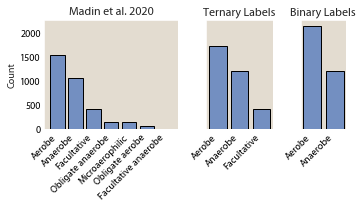

In [3]:
fig, axs = plt.subplots(figsize=(5,3), ncols=3, sharey=True,
                        gridspec_kw={"width_ratios": [2, 1, 2/3]})
c = colors["blue"]

plt.sca(axs[0])
training_labels = training_data["labels"]
counts = training_labels["OXYGEN_REQUIREMENT"].value_counts()

xs = np.arange(counts.size)
#plt.yscale("log")
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.ylabel("Count")
plt.title("Madin et al. 2020")

plt.sca(axs[1])
counts = training_labels["physiology"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Ternary Labels")


plt.sca(axs[2])
counts = training_labels["physiology"].replace(
    "Facultative", "Aerobe").value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Binary Labels")

plt.tight_layout()
plt.savefig("training_data_summary.png", dpi=300, facecolor="w")
plt.show()


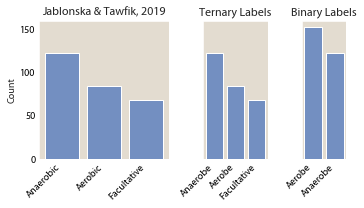

In [4]:
fig, axs = plt.subplots(figsize=(5,3), ncols=3, sharey=True,
                        gridspec_kw={"width_ratios": [2, 1, 2/3]})
c = colors["blue"]

plt.sca(axs[0])
validation_labels = validation_data["labels"]
counts = validation_labels["Oxygen requirement"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.ylabel("Count")
plt.title("Jablonska & Tawfik, 2019")

plt.sca(axs[1])
counts = validation_labels["physiology"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Ternary Labels")


plt.sca(axs[2])
counts = validation_labels["physiology"].replace(
    "Facultative", "Aerobe").value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Binary Labels")

plt.tight_layout()
plt.savefig("training_data_summary.png", dpi=300, facecolor="w")
plt.show()


In [5]:
# Load model results
model_results_df = pd.read_pickle('logisticReg_l2_c100_models.noNorm.pkl')
model_results_long_df = model_results_df.melt(
    id_vars='feature_set', 
    value_vars=['balanced_accuracy', 'test_balanced_accuracy'],
    value_name='balanced_accuracy', var_name='evaluation').sort_values('balanced_accuracy')
model_results_long_df['eval_name'] = model_results_long_df['evaluation'].map({
    'balanced_accuracy': 'training',
    'test_balanced_accuracy': 'validation'
})

feature_name_map = {
    'Nucleotide kmer counts (1 mer)': 'NT 1-mer',
    'Nucleotide kmer counts (2 mer)': 'NT 2-mer',
    'Nucleotide kmer counts (3 mer)': 'NT 3-mer',
    'Nucleotide kmer counts (4 mer)': 'NT 4-mer',
    'Amino acid counts (1 mer)': 'AA 1-mer',
    'Amino acid counts (2 mer)': 'AA 2-mer',
    'Amino acid counts (3 mer)': 'AA 3-mer',
    'Number of genes': 'Gene count',
    'Number of O2 genes': 'O$_2$ gene count',
    'Percent O2 genes': 'O$_2$ gene fraction',
    'All O2 genes': 'O$_2$ utilizing enzymes',
    'Terminal oxidase genes': 'Terminal oxidases',
    '5 gene set genes': '5 gene set',
    'All KO families': 'KO family counts',
    'genome embedding': 'Genome embedding'}
model_results_long_df['feature_name'] = model_results_long_df['feature_set'].map(
    feature_name_map)
model_results_long_df.head()

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_4116/1240944503.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  model_results_long_df = model_results_df.melt(


,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
27,Nucleotide kmer counts (1 mer),test_balanced_accuracy,0.348211,validation,NT 1-mer
11,Nucleotide kmer counts (1 mer),balanced_accuracy,0.386697,training,NT 1-mer
28,Nucleotide kmer counts (2 mer),test_balanced_accuracy,0.421019,validation,NT 2-mer
16,Number of genes,test_balanced_accuracy,0.440509,validation,Gene count
0,Number of genes,balanced_accuracy,0.466482,training,Gene count


In [6]:
model_results_long_df.head()

,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
27,Nucleotide kmer counts (1 mer),test_balanced_accuracy,0.348211,validation,NT 1-mer
11,Nucleotide kmer counts (1 mer),balanced_accuracy,0.386697,training,NT 1-mer
28,Nucleotide kmer counts (2 mer),test_balanced_accuracy,0.421019,validation,NT 2-mer
16,Number of genes,test_balanced_accuracy,0.440509,validation,Gene count
0,Number of genes,balanced_accuracy,0.466482,training,Gene count


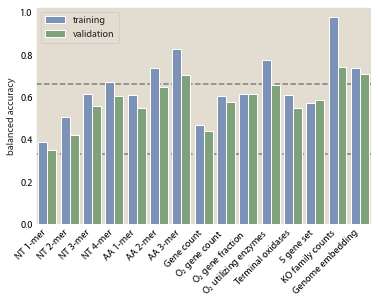

In [7]:
hue_order = 'training,validation'.split(',')
order = 'NT 1-mer,NT 2-mer'
sns.barplot(data=model_results_long_df,
            x='feature_name', y='balanced_accuracy', hue='eval_name', 
            palette=default_pal[1:], order=feature_name_map.values(), 
            hue_order=hue_order)

plt.axhline(0.66, ls='--', color='grey', zorder=-1)
plt.axhline(0.33, ls='--', color='grey', zorder=-1)
plt.legend(title='')
plt.ylabel('balanced accuracy')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.show()

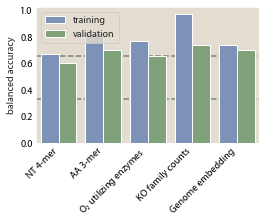

In [8]:
select_models = [
    'Nucleotide kmer counts (4 mer)',
    'Amino acid counts (3 mer)',
    'All O2 genes',
    'All KO families',
    'genome embedding',
]

plt.figure(figsize=(4, 2.5))
hue_order = 'training,validation'.split(',')
order = [feature_name_map[x] for x in select_models]
mask = model_results_long_df.feature_set.isin(select_models)
sns.barplot(data=model_results_long_df[mask],
            x='feature_name', y='balanced_accuracy', hue='eval_name', 
            palette=default_pal[1:], order=order,
            hue_order=hue_order)

plt.axhline(0.66, ls='--', color='grey', zorder=-1)
plt.axhline(0.33, ls='--', color='grey', zorder=-1)
plt.legend(title='', loc=2)
plt.ylabel('balanced accuracy')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
model_results_long_df[mask]

,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
30,Nucleotide kmer counts (4 mer),test_balanced_accuracy,0.603413,validation,NT 4-mer
21,All O2 genes,test_balanced_accuracy,0.655042,validation,O$_2$ utilizing enzymes
14,Nucleotide kmer counts (4 mer),balanced_accuracy,0.673315,training,NT 4-mer
26,Amino acid counts (3 mer),test_balanced_accuracy,0.704285,validation,AA 3-mer
23,genome embedding,test_balanced_accuracy,0.707161,validation,Genome embedding
7,genome embedding,balanced_accuracy,0.737981,training,Genome embedding
22,All KO families,test_balanced_accuracy,0.740200,validation,KO family counts
5,All O2 genes,balanced_accuracy,0.773037,training,O$_2$ utilizing enzymes
10,Amino acid counts (3 mer),balanced_accuracy,0.828683,training,AA 3-mer
6,All KO families,balanced_accuracy,0.978323,training,KO family counts


In [10]:
EMP_meta_df = pd.read_csv('~/Downloads/EarthMicrobiome_metadata.tsv', sep='\t', index_col=0)
EMP_res_df = pd.read_csv('~/Downloads/aa3mer.aerotype.EarthMicrobiome.csv', index_col=0)
EMP_merged = EMP_res_df.join(EMP_meta_df, how='inner')


In [64]:
# Earth Microbiome Project has a lot habitat name inconsistencies
# This is a semi-manual renaming of the habitats
# TODO: factor this out into a separate script
renaming_habitat = {
    'Human feces': 'Animal feces',
    'Human fecal': 'Animal feces',
    'Goate feces': 'Animal feces',
    'freshwater': 'Freshwater',
    'freshwater lake': 'Freshwater',
    'landfill leachate': 'Landfill leachate',
    'Pelagic marine': 'Marine',
    'Cattle and sheep rumen': 'Rumen',
    'rumen': 'Rumen',
    'hot spring sediment': 'Hot spring sediment',
    'wastewater': 'Wastewater',
    'hydrothermal vent': 'Hydrothermal vent',
    'sediment': 'Sediment',
    'activated sludge': 'Activated sludge',
    'Sheep rumen': 'Rumen',
    'Camel rumen': 'Rumen',
    'soil': 'Soil',
    'compost': 'Compost',
    'defined medium': 'Defined medium',
    'Moose rumen': 'Rumen',
    'Bovine rumen': 'Rumen',
    'sewage': 'Sewage',
    'anaerobic enrichment culture': 'Anaerobic enrichment culture',
    'Activated Sludge': 'Activated sludge',
    'freshwater microbial mat': 'Freshwater microbial mat',
    'seawater': 'Seawater',
    'city subway': 'City subway',
    'City subway metal': 'City subway',
    'city subway metal': 'City subway',
    'city subway wood': 'City subway',
    'city subway metal/plastic': 'City subway',
    'Human host-associated': 'Human associated',
    'Human skin': 'Human associated',
    'saline water': 'Saline water',
    'Human': 'Human associated',
    'hydrothermal vent microbial mat': 'Hydrothermal vent microbial mat',
    'marine': 'Marine',
    'watersheds': 'Watersheds',
    'Fecal': 'Animal feces',
    'Capybara group fecal': 'Animal feces',
    'insecta': 'Insecta',
    'ant dump': 'Ant dump',
    'marine sediment': 'Marine sediment',
    'plant litter': 'Plant litter',
    'biosolids': 'Biosolids',
    'ant gut': 'Ant gut',
    'Human gut': 'Human associated',
    'Freshwater Sediment': 'Freshwater sediment',
    'Orangutan group fecal': 'Animal feces',
    'feces': 'Animal feces',
    'Elk feces': 'Animal feces',
    'corn rhizosphere': 'Rhizosphere',
    'city subway metalplastic': 'City subway',
    'Deep surbsurface': 'Deep subsurface',
    'deep subsurface': 'Deep subsurface',
    'fungus garden': 'Fungus garden',
    'surface seawater': 'Seawater',
    'lab-scale EBPR bioreactor': 'Bioreactor',
    'miscanthus rhizosphere': 'Rhizosphere',
    'Miscanthus rhizosphere': 'Rhizosphere',
    'Arabidopsis thaliana rhizosphere': 'Rhizosphere',
    'Arabidopsis rhizosphere': 'Rhizosphere',
    'Corn rhizosphere': 'Rhizosphere',
    'switchgrass rhizosphere': 'Rhizosphere',
    'Switchgrass rhizosphere': 'Rhizosphere',
    'rhizosphere': 'Rhizosphere',
    'Populus rhizosphere': 'Rhizosphere',
    'Corn, switchgrass and miscanthus rhizosphere': 'Rhizosphere',
    'Tabebuia heterophylla rhizosphere': 'Rhizosphere',
    'iron-sulfur acid spring': 'Iron-sulfur acid spring',
    'deep subsurface aquifer': 'Deep subsurface aquifer',
    'Rat Cecum': 'Rat cecum',
    'fungus gardens': 'Fungus garden',
    'bulk soil': 'Soil',
    'leaf surface': 'Leaf surface',
    'Asian elephant fecal': 'Animal feces',
    'Eastern black-and-white colobus group fecal': 'Animal feces',
    'Western lowland gorilla individual fecal': 'Animal feces',
    'Ring-tailed lemur group fecal': 'Animal feces',
    'Orangutan individual fecal': 'Animal feces',
    'Huma fecal': 'Animal feces',
    'Lyns pardinus fecal': 'Animal feces',
    'Human oral': 'Human associated',
    'Human colon tissue': 'Human associated',
    'Human bile duct': 'Human associated',
    'Human lung': 'Human associated',
    'Premature human infant gut': 'Human associated',
    'anaerobic bioreactor biomass': 'Anaerobic bioreactor biomass',
    'food waste': 'Food waste',
    'sludge': 'Sludge',
    'raw primary sludge': 'Raw sludge',
    'active sludge': 'Activated sludge',
    'Active sludge': 'Activated sludge',
    'granular sludge': 'Granular sludge',
    'Anaerobic biogas reactor': 'Biogas fermentation',
}

# Make a processed habitat column that is more uniform
EMP_merged['habitat_processed'] = EMP_merged['habitat'].str.strip().replace(renaming_habitat)

In [65]:
counts = EMP_merged.habitat_processed.value_counts().sort_values(ascending=False)

counts.head(20)

Human associated             8243
Animal feces                 8223
Marine                       4737
Freshwater                   4123
City subway                  2371
Anaerobic digestor sludge    1656
Host-associated              1274
Rhizosphere                  1014
Seawater                      805
Hot spring                    734
Soil                          716
Rumen                         646
Freshwater lake               564
Salt marsh                    534
Groundwater                   525
Deep subsurface               514
Switchgrass degrading         494
Saline lake                   480
Deep ocean                    442
Peatland                      433
Name: habitat_processed, dtype: int64

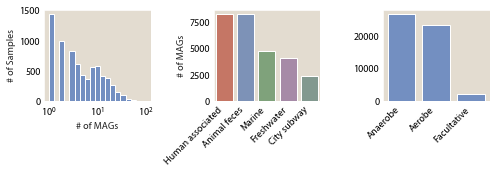

In [66]:
# Properties of the EMP dataset
fig, axs = plt.subplots(figsize=(7, 2.5), ncols=3)

plt.sca(axs[0])
bins = np.logspace(0, 2, 20)
plt.xscale('log')
x = plt.hist(EMP_merged.metagenome_id.value_counts(), bins=bins, color=colors["blue"])
plt.xlabel('# of MAGs')
plt.ylabel('# of Samples')

plt.sca(axs[1])
# Count up all the labels of MAGS from EMP by habitat
habitat_counts = EMP_merged.habitat_processed.value_counts().sort_values(ascending=False)
sns.barplot(y=habitat_counts[:5], x=habitat_counts[:5].index.values, palette=default_pal)
plt.xticks(rotation=45, ha='right')
plt.ylabel('# of MAGs')

plt.sca(axs[2])
# Count up all the labels of MAGS from EMP
label_counts = EMP_merged.label.value_counts()

plt.bar(np.arange(3), label_counts.values, color=colors["blue"])
plt.xticks(np.arange(3), label_counts.index.values, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [67]:
# Calculate the aerobe/anaerobe fractions for each sample
# TODO: factor this out into a separate script
ids = []
rows = []
for gid, gdf in EMP_merged.groupby('metagenome_id'):
    counts = gdf.label.value_counts()
    normed_counts = counts.astype(float) / counts.sum()
    normed_counts.index = ['f_{0}'.format(c) for c in normed_counts.index]
    counts['total'] = counts.sum()
    rows.append(pd.concat([counts, normed_counts]))
    ids.append(gid)

fracs = pd.DataFrame(rows, index=ids)
fracs = fracs.fillna(0)

# Add the habitat information back in 
habitats_by_sample = EMP_merged.groupby('metagenome_id').habitat_processed.first()
fracs['habitat'] = habitats_by_sample.loc[fracs.index]

In [68]:
# Take the mean aerobe/anaerobe fractions across habitat categories
agg_dict = {'Anaerobe': 'sum', 'Aerobe': 'sum', 'Facultative': 'sum', 'total': 'sum'}
mean_fracs = fracs.groupby('habitat').agg(agg_dict).sort_values('total', ascending=False)
mean_fracs['f_Anaerobe'] = mean_fracs['Anaerobe'] / mean_fracs['total']
mean_fracs['f_Aerobe'] = mean_fracs['Aerobe'] / mean_fracs['total']
mean_fracs['f_Facultative'] = mean_fracs['Facultative'] / mean_fracs['total']
mean_fracs.sort_values('f_Anaerobe', ascending=False)

,Anaerobe,Aerobe,Facultative,total,f_Anaerobe,f_Aerobe,f_Facultative
habitat,,,,,,,
Soil from Bioreactor,5.0,0.0,0.0,5.0,1.0,0.000000,0.000000
Well water,2.0,0.0,0.0,2.0,1.0,0.000000,0.000000
Marine hydrothermal vent,48.0,0.0,0.0,48.0,1.0,0.000000,0.000000
Polluted lake sediment,3.0,0.0,0.0,3.0,1.0,0.000000,0.000000
hotspring,5.0,0.0,0.0,5.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...
Rice-straw enriched compost,0.0,51.0,3.0,54.0,0.0,0.944444,0.055556
Cryconite,0.0,45.0,1.0,46.0,0.0,0.978261,0.021739
Photobioreactor incubated,0.0,5.0,0.0,5.0,0.0,1.000000,0.000000


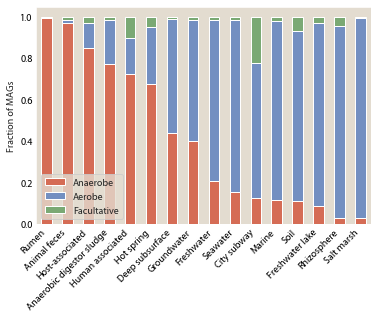

In [73]:
cols = 'f_Anaerobe,f_Aerobe,f_Facultative'.split(',')
mask = mean_fracs.total > 500
mean_fracs[cols][mask].sort_values('f_Anaerobe', ascending=False).plot(
    kind='bar', stacked=True, color=default_pal[:3])
plt.legend('Anaerobe,Aerobe,Facultative'.split(','))
plt.ylabel('Fraction of MAGs')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.savefig('tmp.png', facecolor='white', bbox_inches='tight', dpi=300)